In [32]:
# Dataset link => https://datahub.io/machine-learning/breast-w#resource-breast-w_zip
# import the librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # To split the dataset
from matplotlib.colors import ListedColormap # Colormap object generated from a list of colors
#from sklearn.preprocessing import Imputer # Imputation transformer for completing missing values
from sklearn.impute import SimpleImputer

In [33]:
# Load the dataset
data = pd.read_csv('breast-w_csv.csv')

In [34]:
# show the 5 first rows
data.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [35]:
# separate the dependent variable from the independent variables
X = data.iloc[:,-10:-1].values
target = data['Class'].values

In [36]:
# Columns that have null values
data.isna().any()

Clump_Thickness          False
Cell_Size_Uniformity     False
Cell_Shape_Uniformity    False
Marginal_Adhesion        False
Single_Epi_Cell_Size     False
Bare_Nuclei               True
Bland_Chromatin          False
Normal_Nucleoli          False
Mitoses                  False
Class                    False
dtype: bool

In [38]:
# infer the missing values from the known part of the data
imput = SimpleImputer(
    missing_values=np.nan, 
    strategy='mean' # replace missing values using the mean along each column
)
# imput.fit(X[:,[4,6]])
imput.fit(X[:,5:6])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [39]:
# imput all the missing values
X[:, 5:6] = imput.transform(X[:,5:6])

In [40]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
target = lb_make.fit_transform(data['Class'].values)

In [41]:
# split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42, stratify = target)

In [42]:
X_train.shape

(489, 9)

In [43]:
# We know that our visualization method only takes two dimensions
# We want to reduce dimensionality without losing information.
# we call PCA
from sklearn.decomposition import PCA

In [44]:
# We want to have two components
pca = PCA(n_components = 2)

In [45]:
# We have 9 dimensionality in the X_train and X_test data
# Apply our PCA to the X_train and X_test data to reduce the dimentionality
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
X_train.shape

(489, 2)

In [47]:
# Size of the variance explained by each of the components.
explain_variance = pca.explained_variance_ratio_

In [48]:
print(explain_variance)

[0.68478624 0.07405559]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [51]:
# fit the classifier to data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
y_pred = knn_classifier.predict(X_test)

In [53]:
print(knn_classifier.score(X_train, y_train))

0.9815950920245399


In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[132   6]
 [  2  70]]


In [64]:
def show_dec_region(X, y, classifier, test_idx=None, resolution=0.02):
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'green', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # Plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)

   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='legend')


In [60]:
X_combine = np.vstack((X_train, X_test))
#Stack tables in sequence vertically
y_combine = np.hstack((y_train, y_test))
#Stack tables in sequence horizontally

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
c:\users\sm-pc\devs\tensorflowobjectdetectionapi\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


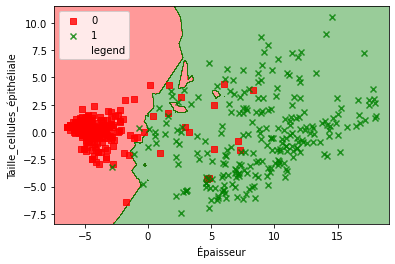

In [65]:
show_dec_region(X_combine,
                      y_combine, classifier=knn_classifier, test_idx=range(105,150))
   
plt.xlabel('Épaisseur')
plt.ylabel('Taille_cellules_épithéliale')
plt.legend(loc='upper left')
plt.show()